## The Spark foundation 

## Task 3: To explore Unsupervised Machine learning




###  Task : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

#### Dataset used is available [here](https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view)

## Import necessary libraries

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
## imort data

df = pd.read_csv('Iris.csv')
print('Read data successfully')

Read data successfully


In [3]:
## display data

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## EDA

In [4]:
## check for shape

df.shape

(150, 6)

In [5]:
## check for null values

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
## check for duplicates

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [7]:
## display column names

df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
## display data frame info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
## display describe details of dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


* No duplicates present 
* No null values in the dataset

In [10]:
## get count of species

df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

* There are 3 different species, each of 50 in number

## Visualisations

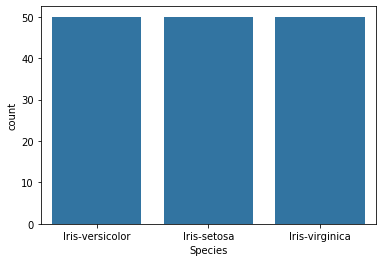

In [11]:

base = sb.color_palette()[0]
sorted = df['Species'].value_counts().index
sb.countplot(data = df , x = 'Species', order = sorted, color = base);

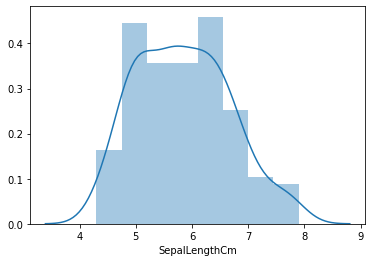

In [12]:
sb.distplot(df['SepalLengthCm']);

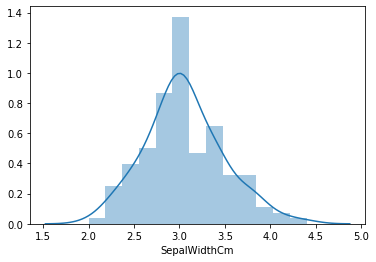

In [13]:
sb.distplot(df['SepalWidthCm']);

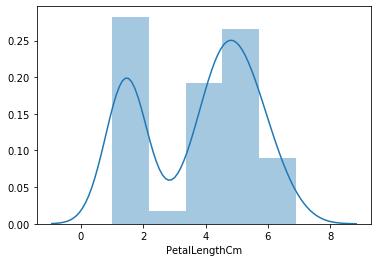

In [14]:
sb.distplot(df['PetalLengthCm']);

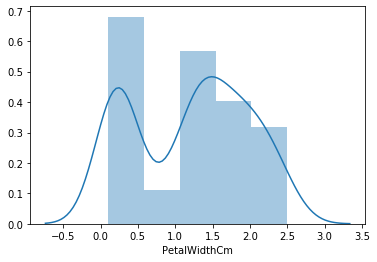

In [15]:
sb.distplot(df['PetalWidthCm']);

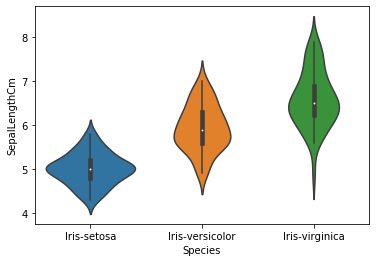

In [16]:
sb.violinplot(data = df, x = 'Species', y = 'SepalLengthCm');

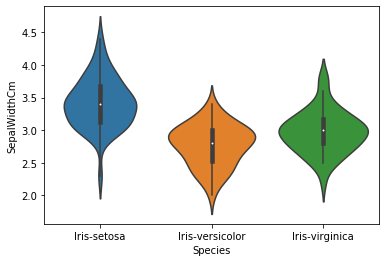

In [17]:
sb.violinplot(data = df, x = 'Species', y = 'SepalWidthCm');

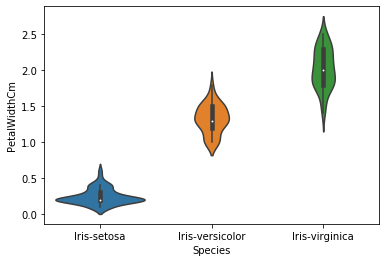

In [18]:
sb.violinplot(data = df, x = 'Species', y = 'PetalWidthCm');

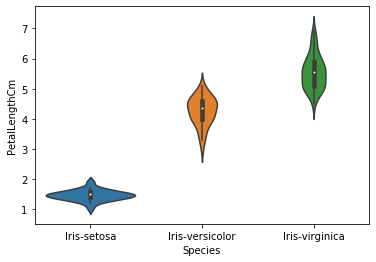

In [19]:
sb.violinplot(data = df, x = 'Species', y = 'PetalLengthCm');

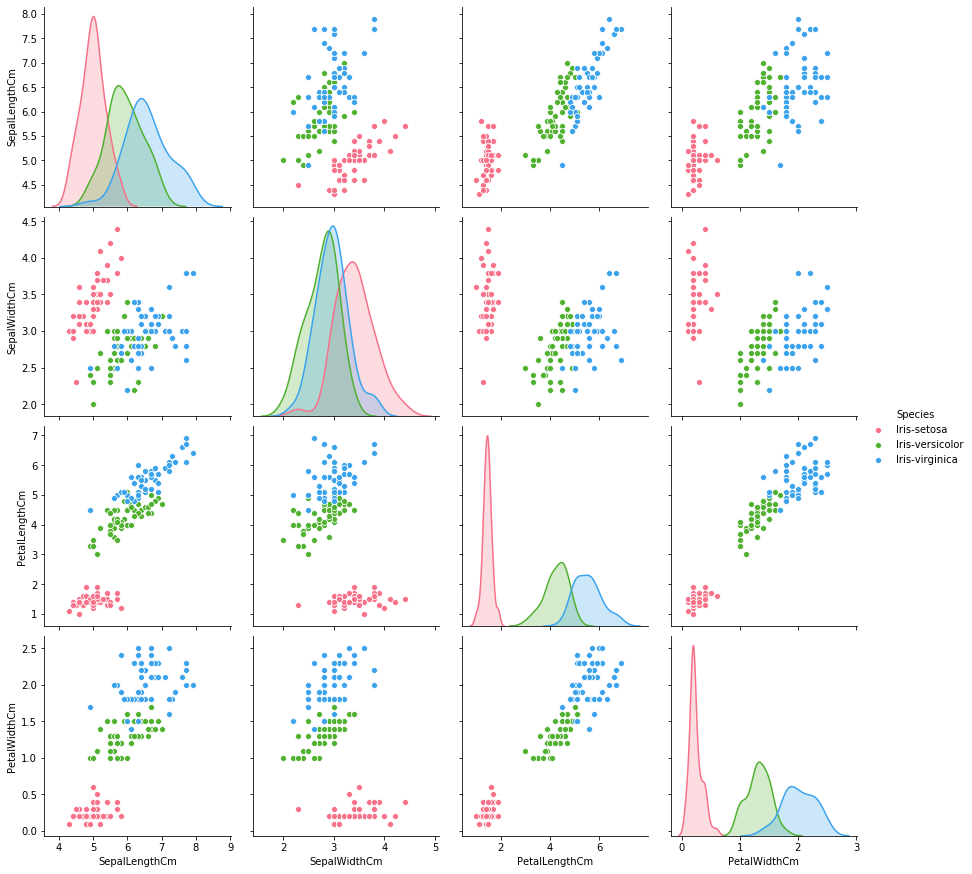

In [20]:
sb.pairplot(df.drop('Id',axis = 1),hue = 'Species',palette='husl',height=3, diag_kind= 'kde');


In [21]:
## drop id column and species column to check correlation between the other features

df_mod = df.drop(columns=['Id','Species'], axis = 1)

In [22]:
df_mod.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


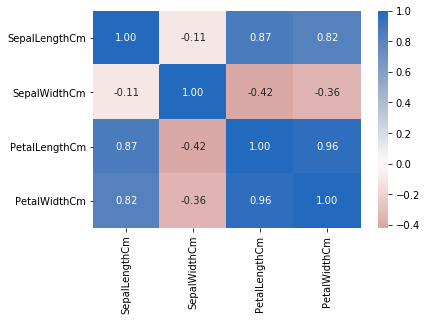

In [23]:
sb.heatmap(df_mod.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

* The heatmap shows the correlation between various features

## Finding optimum number of clusters for K means , using elbow method 

In [24]:
# select the required values from the required columns

x = df.drop(columns= ['PetalWidthCm', 'Species'], axis = 1).values


In [25]:
## define list
within_css = [] # within cluster sum of square

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    within_css.append(kmeans.inertia_)



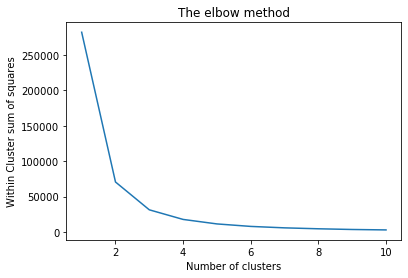

In [26]:
## plot the graph to observe elbow

plt.plot(range(1, 11), within_css)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster sum of squares') 
plt.show()

* From the above we can clearly observe that the elbow has occured at 3. this is the point where there is no significant decrease in WCSS 

* So the ideal value for k is **3**

## Apply Kmeans and Visualise the clusters

In [27]:
## apply kmeans and visualise

#  Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

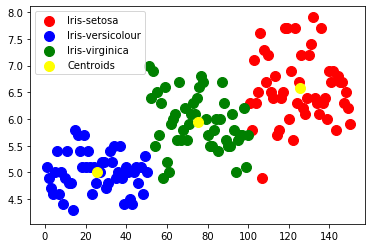

In [28]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend();

* from the above graph we can conclude that kmeans as classified each iris category without overlap of any labels with other category